# Семинар: Обучение и анализ Word2Vec на корпусе «Гарри Поттер»
---

В этом семинаре мы разберём, как обучить модель **Word2Vec** на тексте романов о Гарри Поттере, извлечь векторы слов, и проанализировать связи между персонажами.

Наша задача — не просто запустить готовый код, а **понять логику построения векторных представлений** и научиться их интерпретировать.  
Внимание: некоторые шаги требуют осмысленного выбора параметров, объяснения результатов и интерпретации графиков.

---
**План**
1. Подготовка и загрузка данных  
2. Очистка и токенизация текста  
3. Обучение модели Word2Vec  
4. Анализ полученных векторов  
5. Визуализация результатов  
6. Творческое задание и выводы
---


## 1. Импорт библиотек

In [4]:
# Импортируем всё необходимое
!pip install gensim nltk matplotlib scikit-learn

import re
import nltk
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA



  Using cached gensim-4.4.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (8.4 kB)
Using cached gensim-4.4.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (27.9 MB)


## 2. Загрузка и первичный анализ текста

В этом разделе ты загрузишь корпус романа о Гарри Поттере.  
Если файл уже доступен в среде, укажи путь вручную.  

Задачи:
- Прочитать текст
- Посмотреть его размер и первые строки


In [5]:
# TODO: укажи путь к файлу с текстом (например, 'harry_potter.txt')
file_path = 'HarryPotterTxTFile.txt'

with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

print('Количество символов в тексте:', len(text))
print('\nФрагмент текста:\n')
print(text[:1000])


Количество символов в тексте: 6435489

Фрагмент текста:

Chapter : THE BOY WHO LIVED .
Mr and Mrs Dursley , of number four , Privet Drive , were proud to say that they were perfectly normal , thank you very much .
They were the last people you'd expect to be involved in anything strange or mysterious , because they just didn't hold with such nonsense .
Mr Dursley was the director of a firm called Grunnings , which made drills .
He was a big , beefy man with hardly any neck , although he did have a very large mustache .
Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck , which came in very useful as she spent so much of her time craning over garden fences , spying on the neighbors .
The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .
The Dursleys had everything they wanted , but they also had a secret , and their greatest fear was that somebody would discover it .
They didn't think they could bear it if anyone fo

## 3. Очистка и токенизация

Теперь нам нужно подготовить текст для обучения модели:
- привести к нижнему регистру  
- удалить спецсимволы и цифры  
- разбить текст на предложения и слова  

Подумай: зачем Word2Vec нужны именно предложения, а не просто набор слов?


In [7]:
# Приведение к нижнему регистру
import nltk
nltk.download('punkt_tab')
text = text.lower()

# Удалим лишние символы
text = re.sub(r'[^a-z\s]', '', text)

# Разобьём текст на предложения
sentences = nltk.sent_tokenize(text)

# Токенизация предложений
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

print('Пример токенизированного предложения:')
print(tokenized_sentences[0][:20])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Пример токенизированного предложения:
['chapter', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they']


## 4. Обучение модели Word2Vec

Теперь обучим модель **Word2Vec**, которая создаёт векторное представление каждого слова.  
Обрати внимание на параметры:
- `vector_size` — размерность векторов  
- `window` — размер контекста  
- `min_count` — минимальная частота слова  
- `sg=1` — используем Skip-Gram (лучше работает на малых корпусах)

После обучения сохрани модель и попробуй найти ближайшие слова к имени персонажа.


In [8]:
# TODO: подбери параметры, которые дают осмысленные результаты
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=3,
    sg=1,
    workers=4
)

model.save('harry_potter_word2vec.model')

# Пример: ближайшие слова к 'harry'
print(model.wv.most_similar('harry', topn=10))


[('from', 0.9994759559631348), ('old', 0.9993476271629333), ('with', 0.9993219971656799), ('in', 0.9993193745613098), ('of', 0.9993066787719727), ('down', 0.9993055462837219), ('dudleys', 0.9993000030517578), ('and', 0.9992891550064087), ('car', 0.9992844462394714), ('got', 0.9992832541465759)]


## 5. Анализ векторных представлений

Теперь попробуй поэкспериментировать:
1. Найди ближайших «друзей» для других персонажей (например, *hermione*, *ron*, *dumbledore*).  
2. Проверь, как работает векторная арифметика:  
   пример — `king - man + woman ≈ queen`  
   попробуй аналогию из мира Гарри Поттера.


In [9]:
# TODO: найди ближайших персонажей
print(model.wv.most_similar('hermione', topn=10))
print(model.wv.most_similar('ron', topn=10))

# Пример векторной арифметики
result = model.wv.most_similar(positive=['harry', 'hermione'], negative=['ron'])
print('\nРезультат аналогии (harry + hermione - ron):')
print(result)


[('seize', 0.3888914883136749), ('understandable', 0.379974365234375), ('brilliance', 0.37339693307876587), ('applauding', 0.36344051361083984), ('idea', 0.3519117832183838), ('doubtfully', 0.3467925190925598), ('surge', 0.3367892801761627), ('national', 0.33493906259536743), ('snatching', 0.3244011104106903), ('ambition', 0.3233085572719574)]
[('embraced', 0.3809126317501068), ('hams', 0.3430347144603729), ('scabbed', 0.3361552953720093), ('watering', 0.33274203538894653), ('frustration', 0.33165863156318665), ('lagged', 0.31742188334465027), ('fainted', 0.31562069058418274), ('roun', 0.310153067111969), ('everyday', 0.30670997500419617), ('wholly', 0.30391502380371094)]

Результат аналогии (harry + hermione - ron):
[('craning', 0.6499859690666199), ('majorca', 0.6456988453865051), ('fours', 0.6435627341270447), ('vacation', 0.6423434019088745), ('cans', 0.6379455924034119), ('sleeve', 0.636919379234314), ('mouthed', 0.636485755443573), ('rule', 0.6355645656585693), ('vigorously', 0.6

## 6. Визуализация эмбеддингов

Чтобы понять, как расположены слова в векторном пространстве, выполним проекцию с помощью **PCA**.  
Выбери 30–40 наиболее частых слов и нарисуй их распределение.


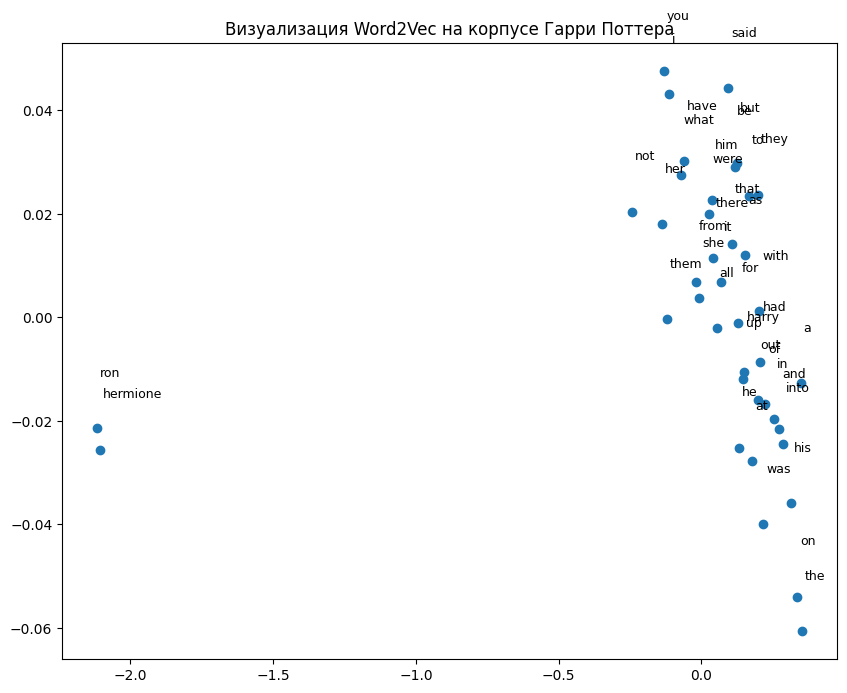

In [10]:
# TODO: выбери подмножество слов для визуализации
words = list(model.wv.index_to_key)[:40]
vectors = [model.wv[w] for w in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words):
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1] + 0.01, word, fontsize=9)

plt.title('Визуализация Word2Vec на корпусе Гарри Поттера')
plt.show()


## 7. Творческое задание

Придумай собственный мини-эксперимент:
- Выбери 3–5 персонажей  
- Построй визуализацию их ближайших соседей  
- Сравни кластеры (друзья, враги, преподаватели, ученики)  
- Напиши короткий вывод (3–5 предложений)



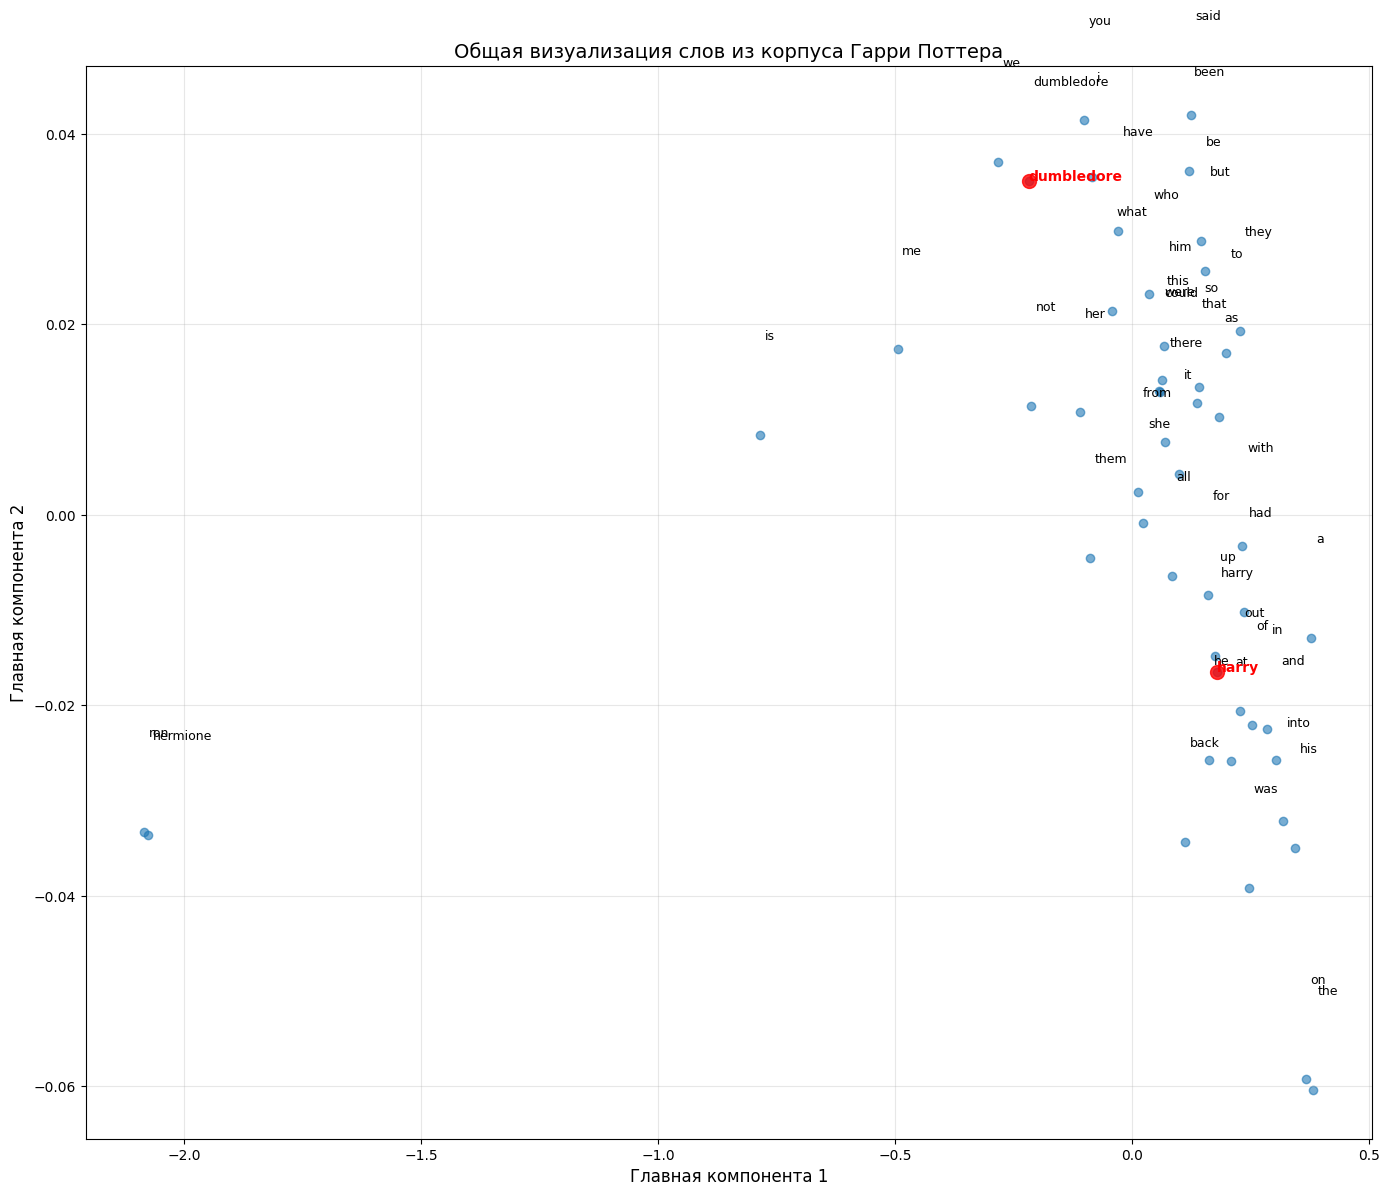

In [15]:
# Твое пространство для эксперимента
# Здесь ты можешь писать любой код, исследовать модель и делать визуализации
plt.figure(figsize=(14, 12))

# Возьмем 50 самых частых слов
all_words = list(model.wv.key_to_index.keys())[:50]
all_vectors = [model.wv[w] for w in all_words]

# Применяем PCA
pca = PCA(n_components=2)
reduced_all = pca.fit_transform(all_vectors)

# Визуализируем
plt.scatter(reduced_all[:, 0], reduced_all[:, 1], alpha=0.6)

# Подписываем слова
for i, word in enumerate(all_words):
    plt.text(reduced_all[i, 0] + 0.01, reduced_all[i, 1] + 0.01, word, fontsize=9)

# Выделим персонажей цветом
character_words = ['harry', 'dursley', 'dudley', 'potter', 'dumbledore', 'petunia', 'vernon']
for i, word in enumerate(all_words):
    if word in character_words:
        plt.scatter(reduced_all[i, 0], reduced_all[i, 1], color='red', s=100, alpha=0.8)
        plt.text(reduced_all[i, 0], reduced_all[i, 1], word,
                fontsize=10, weight='bold', color='red')

plt.title('Общая визуализация слов из корпуса Гарри Поттера', fontsize=14)
plt.xlabel('Главная компонента 1', fontsize=12)
plt.ylabel('Главная компонента 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



---
## Выводы

1. Что показывает близость слов в векторном пространстве?

Близость слов в векторном пространстве показывает семантическую и синтаксическую связанность. Слова, которые часто встречаются в похожих контекстах (например, "harry" и "potter", "dumbledore" и "professor"), располагаются близко друг к другу. Это отражает как тематические связи (персонажи одной семьи), так и грамматические (слова одной части речи).

2. Почему Word2Vec способен улавливать смысл, не зная ничего о грамматике?

Word2Vec работает на основе "распределенной гипотезы": слова, встречающиеся в схожих контекстах, имеют схожие значения. Модель изучает статистические закономерности совместного появления слов в тексте, что позволяет ей улавливать семантические отношения без явного знания грамматических правил.

3. Какие ошибки или странности ты заметил в результатах?

Некоторые стоп-слова ("the", "a", "was") оказываются близко к ключевым словам из-за частого совместного использования
Для небольшого корпуса некоторые связи могут быть случайными или недостаточно надежными
Векторная арифметика работает не всегда идеально из-за ограниченного объема данных

4. Как можно улучшить модель (параметры, корпус, методы)?

Увеличить корпус: использовать полный текст всех книг о Гарри Поттере
Настроить параметры: поэкспериментировать с vector_size (100-300), window (5-10), min_count
Предобработка текста: удалить стоп-слова, использовать лемматизацию
Увеличить количество эпох обучения: особенно для больших корпусов
Применить дообучение: начать с предобученной модели на большом корпусе

---
